In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
udemy_df = pd.read_csv('Data/udemy.csv', parse_dates=['published_time', 'last_update_date'])
udemy_df

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05 22:06:13,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12 18:09:46,NaT,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13 18:07:17,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20 20:08:38,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23 18:31:20,NaT,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209729,4913954.0,Let's Speak Urdu - The Urdu Grammar,True,19.99,Urdu - Become fluent in this beautiful South A...,3.0,0.00,0.0,0.0,5.0,54.0,2022-10-05 11:31:36,2022-10-06,Teaching & Academics,Language Learning,Urdu Language,English,/course/lets-speak-urdu-the-grammar/,Jawaid Hameed,/user/jawaid-hameed/
209730,4914146.0,CompTIA Linux+ (XKO-004/005 # 2 Practice Exam ...,True,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,0.0,2022-10-05 12:29:23,2022-10-05,IT & Software,IT Certifications,CompTIA Linux+,English,/course/comptia-linux-xko-004005-2-practice-ex...,Jean-François d'Halluin,/user/badre-lini/
209731,4914002.0,CISSP 4 full exams #1 : All CISSP domains - 12...,True,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,0.0,2022-10-05 11:04:05,2022-10-05,IT & Software,IT Certifications,CISSP - Certified Information Systems Security...,English,/course/cissp-4-full-exams-1-all-cissp-domains...,Jean-François d'Halluin,/user/badre-lini/
209732,4913934.0,JD Edwards EnterpriseOne Fixed Assets Accounti...,True,119.99,Full-length course (Part-3 of 3) on JD Edwards...,0.0,0.00,0.0,0.0,9.0,82.0,2022-10-05 10:30:19,2022-10-05,Finance & Accounting,Other Finance & Accounting,Financial Accounting,English,/course/jde-fixed-assets-accounting-part-3/,Niranjan Bhatia,/user/systemic-software-solutions/


## Question 5: What is the development trend of categories on udemy over the years?

### Benefits of finding the answer?

- It can help scholars on udemy to choose categories that match current trends.
- Helps instructors on udemy choose to know the current trends.
- Understand the development trend of udemy through the number of courses.
- Capture the ups and downs of categories.
- From the learning trends of categories on udemy, we can partly grasp the development trend of society.
- Looking at the development trends over the years, we can understand the world economy at that time.

### Preprocessing

- To facilitate data processing and data visualization for answering questions, I will take out the columns: `num_subscribers`, `category`, `published_time`.

In [3]:
category_df = udemy_df[['num_subscribers', 'category', 'published_time']]
category_df

,num_subscribers,category,published_time
0,2231.0,Lifestyle,2010-08-05 22:06:13
1,26474.0,Business,2010-01-12 18:09:46
2,1713.0,Lifestyle,2010-10-13 18:07:17
3,4988.0,Lifestyle,2011-06-20 20:08:38
4,1266.0,Design,2011-06-23 18:31:20
...,...,...,...
209729,3.0,Teaching & Academics,2022-10-05 11:31:36
209730,0.0,IT & Software,2022-10-05 12:29:23
209731,0.0,IT & Software,2022-10-05 11:04:05
209732,0.0,Finance & Accounting,2022-10-05 10:30:19


- I will convert the `published_time` column's data to year.

In [4]:
category_df['published_time'] = [item.year for item in category_df['published_time']]
category_df

,num_subscribers,category,published_time
0,2231.0,Lifestyle,2010
1,26474.0,Business,2010
2,1713.0,Lifestyle,2010
3,4988.0,Lifestyle,2011
4,1266.0,Design,2011
...,...,...,...
209729,3.0,Teaching & Academics,2022
209730,0.0,IT & Software,2022
209731,0.0,IT & Software,2022
209732,0.0,Finance & Accounting,2022


### Analyze data to answer the question?

#### Top 5 categories with the most courses in each year in the last 10 years

- Find top 5 categories with the most courses in each year in the last 10 years

In [5]:
category_df = category_df[category_df['published_time'] >= 2012]
years = category_df['published_time'].unique()
years.sort()
top5_by_year = {}
for year in years:
    temp_df = category_df[category_df['published_time'] == year]
    top5_by_year[year] = dict(temp_df['category'].value_counts().head(5))

top5_by_year_df = pd.DataFrame(top5_by_year)
top5_by_year_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Design,77.0,246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Development,71.0,301.0,556.0,1122.0,1682.0,2746.0,4341.0,4266.0,5793.0,5868.0,4883.0
Business,71.0,288.0,564.0,1094.0,970.0,1401.0,2310.0,2540.0,5210.0,6095.0,4116.0
Office Productivity,48.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marketing,47.0,NaN,262.0,583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teaching & Academics,NaN,157.0,280.0,621.0,654.0,1045.0,2000.0,2604.0,5999.0,7836.0,5064.0
Personal Development,NaN,NaN,371.0,812.0,785.0,1150.0,1851.0,2070.0,4700.0,5583.0,3780.0
IT & Software,NaN,NaN,NaN,NaN,788.0,1426.0,2832.0,3794.0,7239.0,8118.0,5475.0


- Visualize top 5 categories with the most courses in each year in the last 10 years

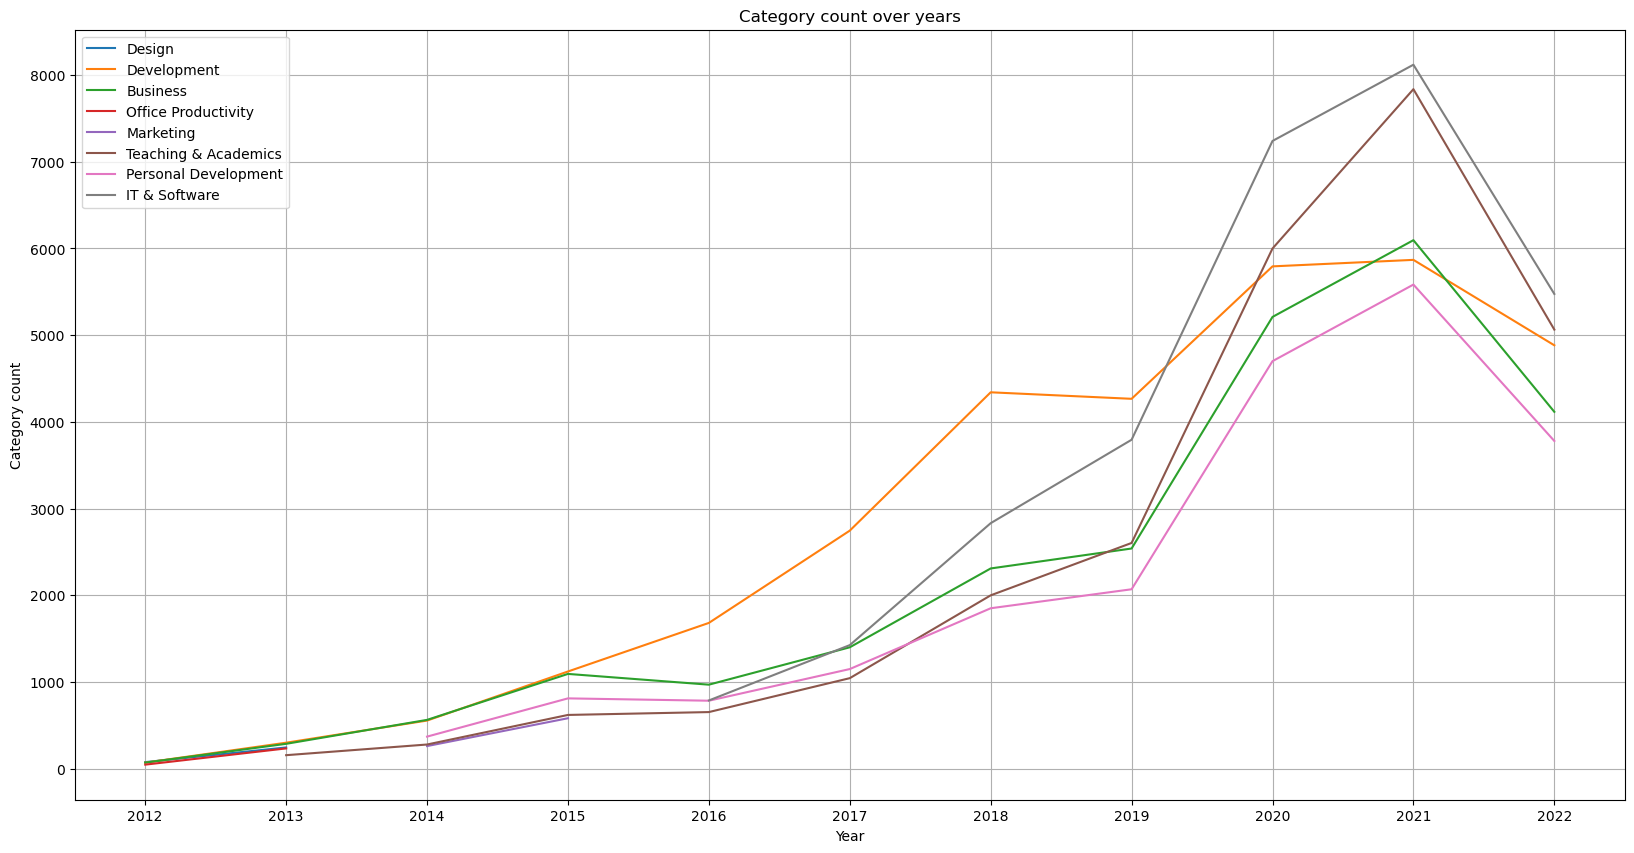

In [6]:
years = top5_by_year_df.columns
indexes = top5_by_year_df.index

plt.figure(figsize=(20, 10))

for index in indexes:
    plt.plot(years, top5_by_year_df.loc[index], label=index)

plt.xlabel('Year')
plt.xticks(years)
plt.ylabel('Category count')
plt.title('Category count over years')
plt.legend()
plt.grid(True)
plt.show()

- The number of courses is constantly increasing over the years, peaking in 2021. Then starting to gradually decrease.
- It can be seen that since 2014, the top 5 categories with the most courses have not changed until now.
- The only course on `Development` and `Business` that has consistently in the top 5 for the last 10 years.

#### Top 5 categories with the most subscribers in each year in the last 10 years

- Find top 5 categories with the most subscribers in each year in the last 10 years

In [7]:
category_df = category_df[category_df['published_time'] >= 2012]
years = category_df['published_time'].unique()
years.sort()
top_5_num_sub_by_year = {}
for year in years:
    temp_df = category_df[category_df['published_time'] == year][['category', 'num_subscribers']]
    count_subscribers = temp_df.groupby('category').sum()
    count_subscribers = count_subscribers.sort_values('num_subscribers', ascending=False).head(5)
    top_5_num_sub_by_year[year] = count_subscribers.to_dict()['num_subscribers']
    
top_5_num_sub_by_year_df = pd.DataFrame(top_5_num_sub_by_year)
top_5_num_sub_by_year_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Development,3347349.0,4419923.0,7825001.0,19452148.0,23243968.0,28960175.0,33328116.0,30577744.0,35987030.0,21102945.0,5015384.0
Design,856180.0,1413478.0,2269090.0,4570584.0,5186103.0,7258269.0,6132732.0,5868624.0,9126293.0,NaN,NaN
Marketing,668090.0,NaN,2235302.0,5114671.0,NaN,NaN,5092388.0,5909142.0,NaN,4691167.0,NaN
Business,582131.0,1725066.0,4256350.0,7011936.0,8370334.0,8838865.0,9334299.0,8078775.0,11702684.0,8170781.0,1886829.0
Teaching & Academics,422963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7455868.0,5778306.0,1282833.0
Office Productivity,NaN,1635717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT & Software,NaN,1029101.0,NaN,5418993.0,7678630.0,11603736.0,13990165.0,19216873.0,25765024.0,16017065.0,3812145.0
Personal Development,NaN,NaN,2633227.0,NaN,4204202.0,4220952.0,NaN,NaN,NaN,NaN,1096987.0


- Visualize top 5 categories with the most subscribers in each year in the last 10 years

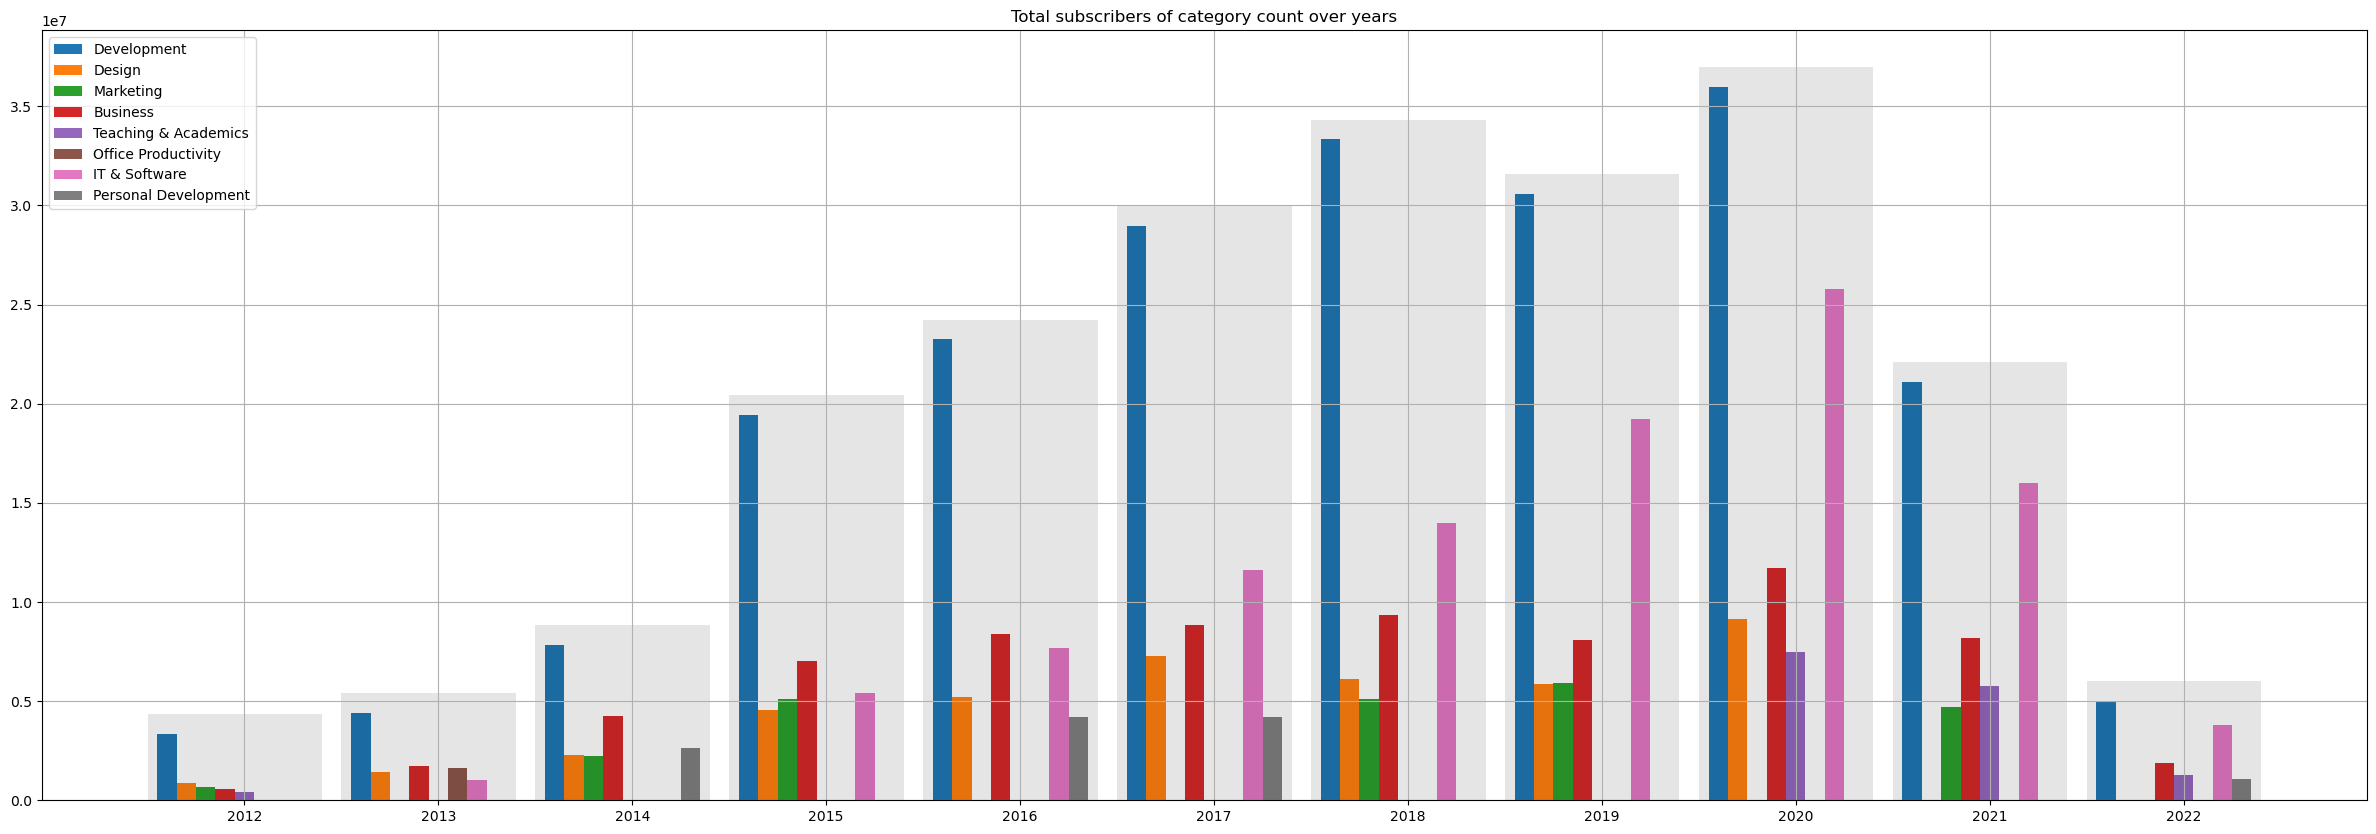

In [8]:
years = top_5_num_sub_by_year_df.columns
indexes = top_5_num_sub_by_year_df.index

plot_df = top_5_num_sub_by_year_df
max_in_year = plot_df.agg(['max'])

bar_width = 0.1
index = np.arange(len(plot_df.columns))
fig, ax = plt.subplots(figsize=(30,10))

count = -3
for i in indexes:
    data = plot_df.loc[i]
    ax.bar(index - bar_width / 2 + bar_width * count, data, bar_width, label=i)
    count += 1

ax.bar(index, max_in_year.loc['max'] + 1000000, bar_width * 9, alpha = 0.1, color='black')
    
ax.set_title('Total subscribers of category count over years')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()
ax.grid(True)
plt.show()

- The number of subscribers for courses has continuously increased over the years, peaking in 2020. Then, it decreased very rapidly.
- There are quite a few fluctuations in the top 5 categories with the most subscribers.
- The only course on `Development` and `Business` that has consistently in the top 5 for the last 10 years.

**Conclusion:**
- Through the two charts showing the top 5 categories with the most courses and the top 5 categories with the most subscribers, it can be seen that categories `Development` and `Business` are always in the top 5 categories. No matter what the trend is, these two categories still occupy an important position.
- From 2018 to 2020, it can be seen that this is the time when the categories have the most subscribers. Maybe because this is the time when the whole world has to fight the Covid-19, so people limit activities at school and an online learning place like Udemy is chosen by everyone to continue their studies.
- Maybe `Development` doesn't have too many courses, specifically from 2020, the number of courses in `Development` is only in the top 3. But the number of subscribers in `Development` is always in the top 1 and the difference is very large compared to the remaining categories.
- Besides, although `IT & Software` has only been developed since 2015, the number of subscribers for this category is top 2 only to `Development` until now.
- It seems that the world is following the trend of technology, so `Development` and `IT & Software` courses are of great interest to everyone.

In [16]:
a = udemy_df.groupby('category')['subcategory'].value_counts()
for k, v in a.items():
    print(k, v)

('Business', 'Entrepreneurship') 4347
('Business', 'Management') 3118
('Business', 'Project Management') 2254
('Business', 'E-Commerce') 2172
('Business', 'Communication') 1970
('Business', 'Sales') 1846
('Business', 'Business Analytics & Intelligence') 1760
('Business', 'Business Strategy') 1588
('Business', 'Human Resources') 1107
('Business', 'Operations') 1084
('Business', 'Other Business') 1070
('Business', 'Industry') 749
('Business', 'Real Estate') 745
('Business', 'Media') 495
('Business', 'Business Law') 365
('Design', '3D & Animation') 3772
('Design', 'Graphic Design & Illustration') 3325
('Design', 'Design Tools') 2308
('Design', 'Web Design') 1360
('Design', 'Architectural Design') 1350
('Design', 'Other Design') 1157
('Design', 'User Experience Design') 584
('Design', 'Game Design') 503
('Design', 'Fashion Design') 494
('Design', 'Interior Design') 403
('Development', 'Web Development') 10393
('Development', 'Programming Languages') 7027
('Development', 'Data Science') 283

In [38]:
# udemy_df[udemy_df['last_update_date'] == NaT]
# udemy_df[np.isnat(udemy_df['last_update_date'])]
a = udemy_df[['published_time', 'last_update_date', 'num_subscribers']]
a['published_time'] = [item.year for item in a['published_time']]
a['last_update_date'] = [item.year for item in a['last_update_date']]
a.sort_values('num_subscribers')

,published_time,last_update_date,num_subscribers
209733,2022,2022.0,0.0
146222,2021,2021.0,0.0
179666,2022,2022.0,0.0
146215,2021,2021.0,0.0
205645,2022,2022.0,0.0
...,...,...,...
20252,2016,2022.0,896340.0
10174,2015,2021.0,1056369.0
16288,2016,2022.0,1108811.0
10724,2015,2021.0,1612862.0
